# RETAIL - Menilai Kinerja Penjualan Jaringan atau Toko Cabang

Toko *retail* bahan bangunan Home World memiliki beberapa toko cabang atau jaringan.

Saat ini, manajer proyek yang bertanggung jawab atas kinerja toko tersebut ingin mengetahui kinerja dari toko-toko cabang dan cabang manakah yang memerlukan dukungan. Ia memerlukan analisa data untuk menetapkan prioritas toko mana yang perlu didukung dan merumuskan KPI yang akan digunakan sebagai acuan untuk mengukur keberhasilan toko-toko tersebut.  

Kumpulan data yang kita miliki saat ini berisi data pembelian yang dilakukan di peritel bahan bangunan Home World. Semua pelanggannya memiliki kartu keanggotaan. Selain itu, mereka dapat menjadi anggota program loyalitas toko seharga $20 per bulan. Program ini mencakup diskon, informasi tentang penawaran khusus, dan hadiah.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Data Penjualan]
        * [2.1.1 Memperbaiki Nama Kolom]
        * [2.1.2 Mengatasi Nilai yang Hilang]
        * [2.1.3 Memperbaiki Nilai Negatif]
        * [2.1.4 Memperbaiki Tipe Data]
        * [2.1.5 Mengatasi Duplikat]
    * [2.2 Data Produk]
        * [2.2.1 Memperbaiki Nama Kolom]
        * [2.2.2 Mengatasi Duplikat]
    * [2.3 Transformasi Data]
    * [2.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 3. Analisa Data]
    * [3.1 Toko Cabang yang Terbesar]
        * [3.1.1 Jumlah Pelanggan Unik]
        * [3.1.2 Besaran Rata-rata Pembelian]
        * [3.1.3 Rata-rata Item dalam Keranjang]
        * [3.1.4 Persentase Pelanggan Program Loyalty dan Non Program]
        * [3.1.5 Persentase Pelanggan yang Melakukan Pembelian Berulang]
        * [3.1.6 Total Penjualan]
    * [3.2 Menghitung Parameter untuk Toko Cabang Selain Cabang Terbesar]
        * [3.1.1 Jumlah Pelanggan Unik]
        * [3.1.2 Besaran Rata-rata Pembelian]
        * [3.1.3 Rata-rata Item dalam Keranjang]
        * [3.1.4 Persentase Pelanggan Program Loyalty dan Non Program]
        * [3.1.5 Persentase Pelanggan yang Melakukan Pembelian Berulang]
        * [3.1.6 Total Penjualan]
    * [3.3 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 4. Menguji Hipotesis]
* [Kesimpulan Umum dan Rekomendasi]

**TAUTAN DASHBOARD:** https://public.tableau.com/app/profile/nadya.susanto/viz/retaildashboard_16896049658320/Dashboard1#1

## Pendahuluan

Dalam proyek kali ini, kita akan mempelajari dan menganalisis data mengenai pembelian seluruh jaringan atau toko cabang dari toko *retail* bahan bangunan Home World untuk mengetahui bagaimana kinerja penjualan masing-masing toko cabang sebagai acuan untuk merumuskan KPI dan menetapkan prioritas toko mana yang perlu didukung.

### Tujuan

1. Merumuskan metrik kinerja penjualan dan menghitungnya untuk setiap toko cabang untuk mengetahui kinerja masing-masing toko.
2. Menguji hipotesis: **Ukuran pembelian rata-rata bagi anggota program loyalitas lebih tinggi daripada bagi non-anggota** dengan menggunakan metode statistik.

### Tahapan
Kumpulan data yang kita miliki terbagi dalam 2 dataset, yaitu:

1. Data mengenai penjualan disimpan pada file `/datasets/retail_dataset_us.csv`. Dataset ini memiliki kolom:
    - `purchaseId` - ID pembelian
    - `item_ID` - ID produk
    - `purchasedate` - tanggal pembelian/transaksi
    - `Quantity` — jumlah produk yang dibeli 
    - `CustomerID` - ID pelanggan
    - `ShopID` - ID toko cabang
    - `loyalty_program` — apakah pelanggan menjadi anggota program loyalitas toko atau tidak
    
2. Data mengenai produk disimpan pada file `/datasets/product_codes_us.csv`. Dataset ini memiliki kolom:
    - `productID` - ID produk
    - `price_per_one` - harga per satuan barang

Langkah-langkah yang akan dilakukan:

1. **Eksplorasi data**: Menentukan *library*, memuat data dan mempersiapkan data sebelum dianalisis. 
2. **Pra-Pemrosesan data**: mengatasi masalah yang muncul pada data seperti nilai yang hilang, duplikasi, kesalahan pada gaya penulisan, mengkonversi tipe data jika diperlukan, dan sebagainya.
3. **Analisa data** :

    3.1 Melakukan penghitungan metrik dengan menggunakan parameter:
     * Berapa jumlah pelanggan unik?
         Metode: gunakan nunique() 
     * Berapa besaran rata-rata pembeliannya?
         Metode: mengagregasi data penjualan dan data produk, menghitung rata-rata pembelian produk per pengguna unik. Visualisasi: scatter plot.
     * Berapa jumlah rata-rata item dalam keranjang?
         Metode: temukan pelanggan unik, lakukan *groupby*/pivot dan agregat ID pelanggan dan hitung rata-rata total pembelian (*quantity*). Visualisasi: scatter plot/bar chart.
     * Menghitung persentase pelanggan yang merupakan anggota program loyalitas di outlet tersebut.
         Metode: melakukan irisan untuk membagi pelanggan menjadi 2 kelompok, yaitu yang membeli program loyalitas dengan yang tidak, kemudian menghitung persentase masing-masing kelompoknya. Visualisasi: pie chart
     * Berapa persentase pelanggan yang kembali atau melakukan pembelian berulang di outlet tersebut?
         Metode: *groupby* ID pelanggan dengan menerapkan *count* > 1 kemudian dibagi dengan total pelanggan unik. Visualisasi: pie chart.
     * Berapa total penjualan setiap toko?
         Metode: menemukan pelanggan unik, membagi pelanggan menjadi 2 kelompok, menghitung total pembelian produk per pengguna. Visualisasi: scatter plot/bar chart.
         
    3.2 Melakukan analisis dan menetapkan toko yang memiliki penjualan paling besar dan paling kecil, dilihat dari salah satu metriknya, yaitu total penjualan yang mencerminkan seberapa besar pendapatan yang dihasilkan oleh toko dan memberikan gambaran tentang seberapa sukses toko dalam menarik pelanggan, menjual produk, dan menghasilkan keuntungan.
    
4. **Menguji Hipotesis** : Menentukan H0: *Tidak ada perbedaan ukuran pembelian rata-rata bagi anggota program loyalitas dengan non-anggota* dan H1: *Terdapat perbedaan ukuran pembelian rata-rata bagi anggota program loyalitas dengan non-anggota* dan menguji hipotesis menggunakan metode statistika seperti *ttest*

5. **Menuliskan Kesimpulan dan Memberikan Rekomendasi** : Memberikan informasi mengenai toko cabang mana yang memiliki penjualan terbesar dan juga toko mana yang perlu dukungan. Selain itu, kita juga perlu memberikan rekomendasi mengenai faktor-faktor yang berpengaruh terhadap kesuksesan sebuah toko cabang, sehingga perusahaan dapat menentukan KPI yang tepat untuk mengukur keberhasilan toko-toko cabang.


## Eksplorasi Data

### Inisialisasi

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from scipy.stats import mannwhitneyu

### Memuat data

In [3]:
df_retail = pd.read_csv('/datasets/retail_dataset_us.csv')
df_product = pd.read_csv('/datasets/product_codes_us.csv', sep = ';')

### Mempersiapkan Data

**Deskripsi Data**

Data `retail` berisi kolom:
 - `purchaseId` - ID pembelian
 - `item_ID` - ID produk
 - `purchasedate` - tanggal pembelian/transaksi
 - `Quantity` — jumlah produk yang dibeli 
 - `CustomerID` - ID pelanggan
 - `ShopID` - ID toko cabang
 - `loyalty_program` — apakah pelanggan menjadi anggota program loyalitas toko atau tidak
    
Data `product` berisi kolom:
 - `productID` - ID produk
 - `price_per_one` - harga per satuan barang    

In [4]:
df_retail

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


In [5]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [6]:
df_retail.isna().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

In [7]:
df_retail['Quantity'].describe()

count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: Quantity, dtype: float64

In [8]:
df_retail[df_retail['Quantity'] < 0].max(), df_retail[df_retail['Quantity'] < 0].min()

(purchaseid                     C545189
 item_ID                              S
 Quantity                            -2
 purchasedate       2017-02-28 17:04:00
 CustomerID                     23956.0
 loyalty_program                      1
 ShopID                          Shop 9
 dtype: object,
 purchaseid                      536589
 item_ID                          11001
 Quantity                        -74216
 purchasedate       2016-12-01 09:41:00
 CustomerID                     18025.0
 loyalty_program                      0
 ShopID                          Shop 0
 dtype: object)

In [9]:
df_retail['purchasedate'].max()

'2017-02-28 17:04:00'

In [10]:
df_retail['purchasedate'].min()

'2016-12-01 08:26:00'

In [11]:
df_retail['loyalty_program'].value_counts()

0    81493
1    23842
Name: loyalty_program, dtype: int64

In [12]:
df_retail['ShopID'].value_counts()

Shop 0     38389
Shop 1      2744
Shop 15     2710
Shop 24     2656
Shop 22     2601
Shop 5      2510
Shop 9      2496
Shop 13     2448
Shop 20     2435
Shop 14     2400
Shop 30     2395
Shop 7      2368
Shop 26     2340
Shop 27     2338
Shop 28     2324
Shop 11     2301
Shop 2      2248
Shop 19     2242
Shop 10     2204
Shop 29     2202
Shop 17     2178
Shop 23     2077
Shop 18     2022
Shop 8      1985
Shop 4      1968
Shop 16     1939
Shop 25     1935
Shop 12     1786
Shop 3      1732
Shop 6      1694
Shop 21     1668
Name: ShopID, dtype: int64

In [13]:
df_product

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
...,...,...
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55


In [14]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [15]:
df_product.isna().sum()

productID        0
price_per_one    0
dtype: int64

In [16]:
df_product['productID'].unique()

array(['10002', '10080', '10120', ..., 'gift_0001_40', 'gift_0001_50',
       'm'], dtype=object)

In [17]:
df_product['price_per_one'].describe()

count    3159.000000
mean        2.954495
std         7.213808
min         0.000000
25%         0.650000
50%         1.450000
75%         3.290000
max       175.000000
Name: price_per_one, dtype: float64

In [18]:
df_product[df_product['price_per_one'] == 0.00]

,productID,price_per_one
34,16033,0.0
54,16207B,0.0
67,17011A,0.0
87,17091A,0.0
95,17165D,0.0
...,...,...
3141,DCGS0055,0.0
3142,DCGS0057,0.0
3145,DCGS0072,0.0
3146,DCGS0074,0.0


### Kesimpulan dan Langkah Selanjutnya

Dataset yang kita miliki terbagi dalam 2 tabel, yaitu:
 * tabel `retail` yang berisi data mengenai penjualan, memiliki 105335 baris dan 7 kolom
 * tabel `product` yang berisi data mengenai produk, memiliki 3159 baris dan 2 kolom
 
Beberapa masalah yang teridentifikasi saat ini:
 * Gaya penulisan nama kolom tidak sesuai, seperti beberapa nama masih menggunakan huruf kapital, beberapa dalam huruf kecil, dan juga nama kolom yang terdiri dari dua kata tidak menggunakan gaya penulisan *snake_case*.
 * Tipe data di beberapa kolom pada tabel `retail` tidak sesuai, yaitu:
     * kolom `purchasedate` seharusnya tipe datanya adalah *datetime* bukan *object*
     * kolom `CustomerID` seharusnya tipe datanya adalah *object* bukan *float*
 * Tabel `product` tidak memiliki nilai yang hilang, namun tabel `retail` memiliki nilai yang hilang cukup banyak di kolom `CustomerID` (sebanyak 36210 atau sekitar 35% dari keseluruhan data).
 * Kolom `Quantity` pada tabel `retail` memiliki nilai anomali, dimana terdapat nilai minus sebanyak 2118 data (sekitar 2%). Seharusnya kolom ini tidak boleh bernilai minus dengan asumsi tidak mungkin ada pembelian jumlah minus.
 * Pada kolom `price_per_one` pada tabel `product` terdapat nilai 0.00 sebanyak 382 data (sekitar 12%). Nilai 0.00 pada kolom yang menunjukkan harga barang sepertinya sedikit aneh.
 * Belum diketahui apakah ada data duplikat atau tidak.
 
Langkah selanjutnya, kita akan memperbaiki masalah yang sudah teridentifikasi di atas pada tahap pra-pemrosesan data.

## Pra-Pemrosesan Data

### Data Penjualan

#### Memperbaiki Nama Kolom

In [19]:
df_retail.columns

Index(['purchaseid', 'item_ID', 'Quantity', 'purchasedate', 'CustomerID',
       'loyalty_program', 'ShopID'],
      dtype='object')

In [20]:
df_retail = df_retail.rename(
    columns = {
        'purchaseid' : 'purchase_id',
        'item_ID' : 'item_id',
        'Quantity' : 'quantity',
        'purchasedate' : 'purchase_date',
        'CustomerID' : 'customer_id',
        'loyalty_program' : 'loyalty_program',
        'ShopID' : 'shop_id'
    }
)

In [21]:
df_retail.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id'],
      dtype='object')

Gaya penulisan kolom sudah diperbaiki dan sudah sesuai.

#### Mengatasi Nilai yang Hilang

In [22]:
df_retail_nan = df_retail[df_retail['customer_id'].isna()]
df_retail_nan.sort_values(by = 'quantity')

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
104960,540564,22617,-2601,2017-01-10 10:36:00,NaN,0,Shop 0
10687,543257,84611B,-1431,2017-02-04 16:06:00,NaN,0,Shop 0
53844,541685,22351,-1401,2017-01-20 15:41:00,NaN,0,Shop 0
79838,540638,72038P,-991,2017-01-10 12:14:00,NaN,0,Shop 0
910,540241,35957,-940,2017-01-05 15:17:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
69000,543051,79062D,959,2017-02-03 10:15:00,NaN,0,Shop 0
21283,540699,POST,999,2017-01-11 09:32:00,NaN,0,Shop 0
6265,543258,84611B,1286,2017-02-04 16:06:00,NaN,0,Shop 0
41559,542505,79063D,2559,2017-01-28 12:04:00,NaN,0,Shop 0


In [23]:
df_retail_nan['shop_id'].value_counts()

Shop 0     36009
Shop 6       128
Shop 25       57
Shop 21       14
Shop 23        2
Name: shop_id, dtype: int64

In [24]:
df_retail_nan['loyalty_program'].value_counts()

0    36210
Name: loyalty_program, dtype: int64

Kita memiliki 36210 jumlah data dengan nilai yang hilang pada kolom `customer_id`, dimana paling banyak terdapat pada cabang *Shop 0* dan semuanya bukan anggota program loyalitas toko.

Hal ini dapat terjadi karena kesalahan sistem yang dapat menyebabkan data tidak terekam dengan benar atau kehilangan informasi pelanggan. Kemungkinan lainnya adalah karena mereka adalah pelanggan baru yang baru pertama kali melakukan pembelian, sehingga mungkin saja mereka belum memiliki *customer_id* yang ditetapkan dalam sistem atau basis data toko cabang, atau bisa saja mereka hanya pelanggan yang melakukan pembelian dan memilih untuk tidak mengidentifikasikan diri mereka (tidak memberikan informasi pelanggan).

Untuk saat ini, kita akan mengganti nilai yang hilang tersebut dengan nilai 0 (nol) yang menandakan mereka merupakan pelanggan yang tidak diketahui, karena kita belum memiliki informasi lebih lanjut apakah data ini akan mempengaruhi analisis kita atau tidak. *customerID* seharusnya berisi nilai unik dan melakukan imputasi untuk mengisi nilai NaN tersebut sepertinya bukan pilihan tepat.

In [25]:
df_retail['customer_id'] = df_retail['customer_id'].fillna('0')

In [26]:
df_retail.isna().sum()

purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
loyalty_program    0
shop_id            0
dtype: int64

Dataset kita saat ini sudah tidak memiliki nilai yang hilang pada kolom-kolomnya.

#### Memperbaiki Nilai Negatif

Sebelumnya, kita mengetahui bahwa terdapat nilai anomali, yaitu nilai minus, pada kolom `quantity`. Seharusnya, kolom ini tidak mungkin bernilai minus, karena merupakan informasi jumlah pembelian, dan tidak mungkin ada jumlah pembelian bernilai minus.
Namun, jumlahnya bervariatif, sehingga hal ini sepertinya bukan terjadi karena anomali, tapi karena kesalahan input atau kesalahan sistem hingga terbaca jadi minus.
Untuk itu, kita akan mengubahnya menjadi nilai absolut.

In [27]:
df_retail['quantity'] = df_retail['quantity'].abs()

In [28]:
df_retail[df_retail['quantity'] < 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id


Nilai negatif pada kolom `quantity` sudah diubah menjadi nilai absolut.

#### Memperbaiki Tipe Data

In [29]:
df_retail['purchase_date'] = pd.to_datetime(df_retail['purchase_date'])

In [30]:
df_retail['customer_id'] = df_retail['customer_id'].astype('int')

In [31]:
#df_retail['customer_id'] = df_retail['customer_id'].replace(-1, 'unknown')

In [32]:
df_retail['customer_id'] = df_retail['customer_id'].astype('object')

In [33]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      105335 non-null  object        
 5   loyalty_program  105335 non-null  int64         
 6   shop_id          105335 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.6+ MB


Tipe data yang salah untuk masing-masing kolom sudah diperbaiki.

#### Mengatasi Duplikat

In [34]:
df_retail.duplicated().sum()

1033

In [35]:
df_retail = df_retail.drop_duplicates()

In [36]:
df_retail.duplicated().sum()

0

In [37]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  object        
 5   loyalty_program  104302 non-null  int64         
 6   shop_id          104302 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 6.4+ MB


Terdapat 1033 data yang terduplikasi pada tabel `retail`, dan setelah dihapus, maka dataset kita saat ini memiliki 104302 baris dan 7 kolom.

### Data Produk

#### Memperbaiki Nama Kolom

In [38]:
df_product.columns

Index(['productID', 'price_per_one'], dtype='object')

In [39]:
df_product = df_product.rename(
    columns = {
        'productID' : 'product_id',
        'price_per_one' : 'price_per_one'
    }
)

In [40]:
df_product.columns

Index(['product_id', 'price_per_one'], dtype='object')

Gaya penulisan kolom sudah diperbaiki dan sudah sesuai.

#### Mengatasi Duplikat

In [41]:
df_product.duplicated().sum()

0

Tidak terdapat data yang terduplikasi pada tabel `product`.

### Transformasi Data

In [42]:
#Kumpulan data yang hilang
df_retail_nan

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


In [43]:
df_product[df_product['price_per_one'] == 0]

,product_id,price_per_one
34,16033,0.0
54,16207B,0.0
67,17011A,0.0
87,17091A,0.0
95,17165D,0.0
...,...,...
3141,DCGS0055,0.0
3142,DCGS0057,0.0
3145,DCGS0072,0.0
3146,DCGS0074,0.0


Pada tahap sebelumnya, kita telah mengetahui bahwa terdapat masalah pada masing-masing tabel yang kita miliki, dimana tabel `retail` memiliki nilai yang hilang pada kolom `customer_id` dan tabel `product` memiliki nilai 0 pada kolom `price_per_one`. Nilai yang hilang telah diganti menjadi 0 dengan asumsi pelanggan tersebut tidak diketahui atau tidak teridentifikasi dan juga, tidak langsung kita hapus, karena kita ingin melihat apakah masih ada relevansinya dengan kolom-kolom lainnya.
Kita akan mencoba untuk menggabungkan kedua tabel tersebut untuk melihat apakah ada hubungan antara nilai yang hilang tersebut dengan nilai 0 pada tabel lainnya dan juga dengan kolom-kolom lainnya.

In [44]:
merged_df = pd.merge(df_retail, df_product, left_on = 'item_id', right_on = 'product_id')
merged_df

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42
...,...,...,...,...,...,...,...,...,...
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38
104298,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95
104299,537025,90053,0,2016-12-03 16:21:00,0,0,Shop 0,90053,2.55
104300,542731,17028J,5,2017-01-31 15:27:00,19279,0,Shop 0,17028J,0.42


Ternyata, selain terdapat nilai yang hilang pada tabel `retail`, keanehan lainnya terdapat pada kolom `quantity` dimana terdapat nilai 0 juga.

In [45]:
filtered_data = merged_df[(merged_df['customer_id'] == 0) & (merged_df['quantity'] == 0) & (merged_df['price_per_one'] == 0)]
filtered_data

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
318,542115,79321,0,2017-01-25 14:01:00,0,0,Shop 0,79321,0.0
328,542625,79321,0,2017-01-31 09:50:00,0,0,Shop 0,79321,0.0
338,544598,79321,0,2017-02-21 18:10:00,0,0,Shop 0,79321,0.0
342,541971,79321,0,2017-01-24 13:48:00,0,0,Shop 0,79321,0.0
347,538177,79321,0,2016-12-10 09:51:00,0,0,Shop 0,79321,0.0
...,...,...,...,...,...,...,...,...,...
104128,536545,21134,0,2016-12-01 14:32:00,0,0,Shop 0,21134,0.0
104156,537878,72803B,0,2016-12-08 18:09:00,0,0,Shop 0,72803B,0.0
104220,536550,85044,0,2016-12-01 14:34:00,0,0,Shop 0,85044,0.0
104255,536552,20950,0,2016-12-01 14:34:00,0,0,Shop 0,20950,0.0


Kita mencoba memfilter data untuk melihat data dengan kondisi:
 - `customer_id` bernilai 0 (tidak diketahui)
 - `quantity` bernilai 0
 - `price_per_one` bernilai 0
 
Dan ternyata, terdapat 2719 data yang memiliki ketiga kondisi di atas sekaligus. Data ini akan kita hapus, dengan pertimbangan bahwa tidak ada informasi tentang pelanggan yang melakukan pembelian karena tidak ada data mengenai jumlah pembeliannya.

In [46]:
merged_df = merged_df.drop(filtered_data.index)
merged_df

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42
...,...,...,...,...,...,...,...,...,...
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38
104298,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95
104299,537025,90053,0,2016-12-03 16:21:00,0,0,Shop 0,90053,2.55
104300,542731,17028J,5,2017-01-31 15:27:00,19279,0,Shop 0,17028J,0.42


Setelah menghapus data yang tidak relevan, dataset kita saat ini berjumlah 101583. Namun, sepertinya masih terdapat beberapa kondisi yang kurang informatif untuk analisis kita. Contohnya:
 - `price_per_one` bernilai 0 dengan `quantity` 0. Meskipun terdapat informasi lainnya, namun data ini menunjukkan bahwa tidak ada transaksi yang dilakukan.
 - `price_per_one` bernilai 0. Data ini tidak memenuhi kriteria karena harga per itemnya 0. Hal ini dapat terjadi karena beberapa alasan, seperti kesalahan input data atau karena barang yang dibeli tidak memiliki harga atau karena barang tersebut didapat secara gratis. Namun, tentu saja kita tidak dapat menggunakannya, karena meskipun terdapat informasi lainnya, harga barang bernilai 0 dapat mengacaukan analisis data, apalagi ketika kita ingin melihat revenue atau rata-rata pembelian(penjualan).
 - `customer_id` bernilai 0 (tidak diketahui). Kolom `customer_id` sebaiknya tidak bernilai 0 atau *unknown*, karena *customer_id* adalah nilai unik yang digunakan untuk mengidentifikasi pelanggan. Meskipun di tahap awal, kita masih mempertahankan data ini, sebaiknya data ini dihapus. Jika *customer_id* bernilai 0, maka berarti bahwa pelanggan tersebut tidak dapat diidentifikasi. Hal ini kemungkinan dapat mempersulit proses analisis data, misalnya jika kita ingin menghitung jumlah pembelian yang dilakukan oleh setiap pelanggan, kita tidak akan menghitung *customer_id* yang bernilai 0.
 
Dengan mempertimbangkan kondisi di atas, maka kita akan menghapus data-data dengan kondisi yang sudah dijelaskan.

In [47]:
merged_filtered = merged_df.query('quantity != 0 and customer_id != 0 and price_per_one != 0')
merged_filtered

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42
5,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,21873,0.42
6,540838,21873,11,2017-01-11 15:13:00,19541,0,Shop 4,21873,0.42
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,21873,0.42
...,...,...,...,...,...,...,...,...,...
104294,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38
104298,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95
104300,542731,17028J,5,2017-01-31 15:27:00,19279,0,Shop 0,17028J,0.42


In [48]:
merged_filtered[merged_filtered['quantity'] == 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one


In [49]:
merged_filtered[merged_filtered['customer_id'] == 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one


In [50]:
merged_filtered[merged_filtered['price_per_one'] == 0.00]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one


In [51]:
merged_filtered['loyalty_program'].value_counts()

0    31644
1    15048
Name: loyalty_program, dtype: int64

In [52]:
merged_filtered.duplicated().sum()

0

In [53]:
merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46692 entries, 0 to 104301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      46692 non-null  object        
 1   item_id          46692 non-null  object        
 2   quantity         46692 non-null  int64         
 3   purchase_date    46692 non-null  datetime64[ns]
 4   customer_id      46692 non-null  object        
 5   loyalty_program  46692 non-null  int64         
 6   shop_id          46692 non-null  object        
 7   product_id       46692 non-null  object        
 8   price_per_one    46692 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.6+ MB


In [54]:
merged_filtered.to_csv('merged_filtered.csv', index=False)

In [55]:
from IPython.display import FileLink

# Membuat tautan untuk file CSV baru
FileLink('merged_filtered.csv')

/home/jovyan/work/merged_filtered.csv

Setelah menghapus sebagian data yang tidak digunakan, saat ini kita memiliki dataset hasil penggabungan kedua tabel dengan 46692 baris dan 9 kolom, tanpa ada nilai yang hilang, maupun bernilai 0 (kecuali kolom `loyalty_program` dimana nilai 0 pada kolom tersebut menunjukkan tipe *boolean*), dan tidak ada data terduplikasi.

Sampel untuk masing-masing kelompok antara anggota program loyalitas dan non-loyalitas masih tetap tidak terdistribusi secara merata, dimana non anggota program (non-loyalitas) masih mendominasi. Meskipun data yang kita miliki saat ini hanya sekitar 45% saja dari data mentah (data awal yang belum difilter), namun data ini berisi informasi yang relevan dengan tujuan analisis kita. 

### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan pra-pemrosesan data, kita mendapat kesimpulan:

1. Terdapat beberapa masalah pada gaya penulisan nama dan tipe data beberapa kolom, dan sudah diperbaiki. Gaya penulisan nama kolom pada dataset kita yang semula tidak mengikuti aturan, sudah diperbaiki sesuai dengan aturan gaya penulisan yang baik, yaitu: semua karakter harus menggunakan huruf kecil dan nama kolom yang terdiri dari dua kata menggunakan gaya penulisan *snake_case*. Untuk kolom-kolom dengan tipe data bermasalah adalah:
     * kolom `purchasedate` pada tabel `retail` seharusnya tipe datanya adalah *datetime* bukan *object*
     * kolom `CustomerID` pada tabel `retail` seharusnya tipe datanya adalah *object* bukan *float*
     
2. Terdapat beberapa masalah pada kedua tabel yang kita miliki, yaitu:
    * Tabel `retail` memiliki nilai yang hilang cukup banyak di kolom `customer_id` (sebanyak 36210 atau sekitar 35% dari keseluruhan data).
    * Kolom `quantity` pada tabel `retail` memiliki nilai anomali, dimana terdapat nilai minus sebanyak 2118 data (sekitar 2%). Seharusnya kolom ini tidak boleh bernilai minus dengan asumsi tidak mungkin ada pembelian jumlah minus.
    * Pada kolom `price_per_one` pada tabel `product` terdapat nilai 0.00 sebanyak 382 data (sekitar 12%). Nilai 0.00 pada kolom yang menunjukkan harga barang sepertinya sedikit aneh.
Langkah awal yang dilakukan adalah mengubah nilai yang hilang pada kolom `customer_id` menjadi 0 (nol) dengan asumsi mereka adalah pelanggan yang tidak diketahui. Namun setelah dianalisa lebih lanjut, terdapat 2719 data dari nilai yang hilang tersebut yang terjadi bersamaan dengan adanya nilai 0 pada kolom lain, seperti `quantity` dan `price_per_one`, dan diputuskan untuk menghapus data ini dengan pertimbangan bahwa tidak ada informasi tentang pelanggan yang melakukan pembelian karena tidak ada data mengenai jumlah pembeliannya.

3. Selain itu, kita juga menghapus data-data dengan kondisi sebagai berikut:
 * `price_per_one` bernilai 0 dengan `quantity` 0. Meskipun terdapat informasi lainnya, namun data ini menunjukkan bahwa tidak ada transaksi yang dilakukan.
 * `price_per_one` bernilai 0. Data ini tidak memenuhi kriteria karena harga per itemnya 0. Harga barang bernilai 0 dapat mengacaukan analisis data, apalagi ketika kita ingin melihat revenue atau rata-rata pembelian(penjualan).
 * `customer_id` bernilai 0 (tidak diketahui). Kolom customer_id sebaiknya tidak bernilai 0 atau *unknown*, karena *customer_id* adalah nilai unik yang digunakan untuk mengidentifikasi pelanggan. Meskipun di tahap awal, kita masih mempertahankan data ini, sebaiknya data ini dihapus. Jika customer_id bernilai 0, maka berarti bahwa pelanggan tersebut tidak dapat diidentifikasi dan kemungkinan dapat mempersulit proses analisis data.
 
4. Sebelum transformasi data, terdapat 1033 data yang terduplikasi pada tabel `retail` dan telah dihapus.
 
5. Setelah menghapus sebagian data yang tidak digunakan, saat ini kita memiliki dataset hasil penggabungan kedua tabel dengan 46692 baris dan 9 kolom, tanpa ada nilai yang hilang, maupun bernilai 0 (kecuali kolom `loyalty_program` dimana nilai 0 pada kolom tersebut menunjukkan tipe *boolean*), dan tidak ada data terduplikasi. Meskipun data yang kita miliki saat ini hanya sekitar 45% saja dari data mentah (data awal yang belum difilter), namun data ini berisi informasi yang relevan dengan tujuan analisis kita. 
 
Selanjutnya, kita akan melakukan analisa data. 
 

## Analisa Data

### Toko Cabang yang Terbesar

In [56]:
merged_filtered['shop_id'].value_counts()

Shop 15    1775
Shop 24    1754
Shop 22    1748
Shop 20    1716
Shop 1     1710
Shop 30    1670
Shop 5     1661
Shop 9     1654
Shop 14    1610
Shop 13    1609
Shop 11    1603
Shop 0     1598
Shop 7     1582
Shop 28    1550
Shop 10    1550
Shop 29    1550
Shop 19    1526
Shop 26    1521
Shop 27    1517
Shop 4     1504
Shop 2     1486
Shop 17    1483
Shop 23    1433
Shop 8     1394
Shop 16    1364
Shop 18    1306
Shop 25    1292
Shop 12    1203
Shop 3     1137
Shop 21    1114
Shop 6     1072
Name: shop_id, dtype: int64

Toko cabang yang terbesar, diartikan sebagai toko yang paling sering muncul pada dataset kita (memiliki baris paling banyak), yaitu **Shop 15**. Maka, kita akan mencoba melihat beberapa parameter pada toko cabang tersebut.

In [57]:
largest_store = merged_filtered[merged_filtered['shop_id'] == 'Shop 15']
largest_store

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,21873,0.42
23,537868,21873,23,2016-12-08 16:49:00,18112,0,Shop 15,21873,0.42
88,542360,22195,1,2017-01-27 12:40:00,20380,0,Shop 15,22195,1.65
132,540268,22195,11,2017-01-06 11:25:00,19137,0,Shop 15,22195,1.65
166,540951,22195,14,2017-01-12 13:10:00,18792,0,Shop 15,22195,1.65
...,...,...,...,...,...,...,...,...,...
103940,541984,21132,3,2017-01-24 15:48:00,18796,0,Shop 15,21132,4.25
103995,542398,90146,1,2017-01-27 15:36:00,18853,0,Shop 15,90146,7.50
104005,543809,44089C,7,2017-02-13 13:52:00,22774,1,Shop 15,44089C,0.42
104118,542398,90016A,2,2017-01-27 15:36:00,18853,0,Shop 15,90016A,8.32


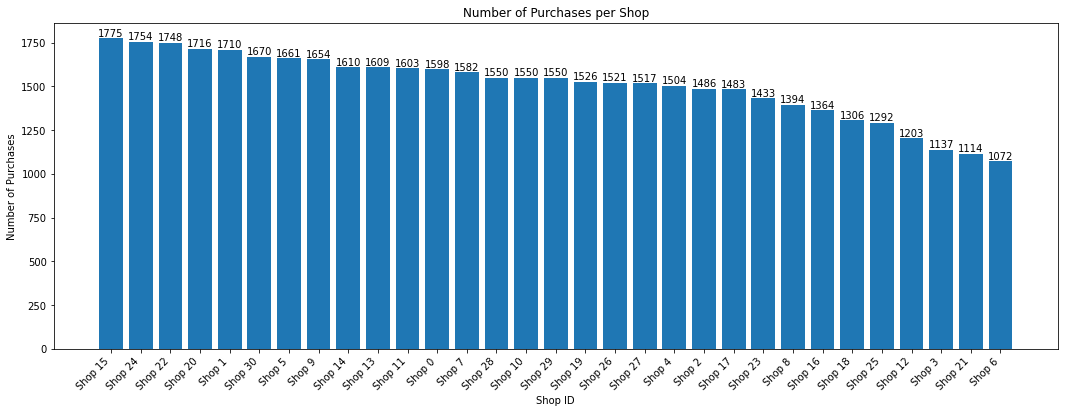

In [119]:
shop_id_counts = merged_filtered['shop_id'].value_counts()

plt.figure(figsize=(18, 6))
plt.bar(shop_id_counts.index, shop_id_counts.values)

for index, value in enumerate(shop_id_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Shop ID')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases per Shop')
plt.xticks(rotation=45, ha='right')

plt.show()


#### Jumlah Pelanggan Unik

In [58]:
largest_store['customer_id'].nunique()

124

Terdapat 124 pelanggan unik di **Shop 15**.

#### Besaran Rata-rata Pembelian

In [59]:
# Membuat kolom baru 'total_price' yang menghitung total harga pembelian untuk setiap baris
largest_store['total_price'] = largest_store['quantity'] * largest_store['price_per_one']

# Membuat pivot table untuk menghitung rata-rata total harga pembelian masing-masing customer unik
largest_pivot = pd.pivot_table(largest_store, index ='customer_id', values = 'total_price', aggfunc = 'mean').sort_values(
    by = 'total_price', ascending = False)

largest_pivot

/tmp/ipykernel_27/3283502756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largest_store['total_price'] = largest_store['quantity'] * largest_store['price_per_one']


,total_price
customer_id,
18025,77182.560000
23129,2077.600000
18904,300.210000
19527,200.153333
21708,122.800000
...,...
23520,2.160000
23298,2.013103
23716,1.450000


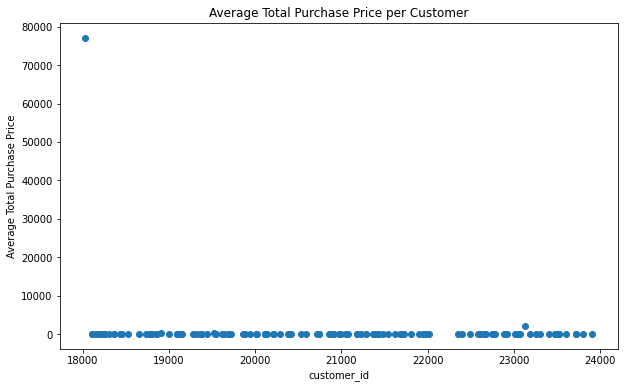

In [60]:
plt.figure(figsize = (10, 6))
plt.scatter(largest_pivot.index, largest_pivot['total_price'])

plt.xlabel('customer_id')
plt.ylabel('Average Total Purchase Price')

plt.title('Average Total Purchase Price per Customer')
plt.show()


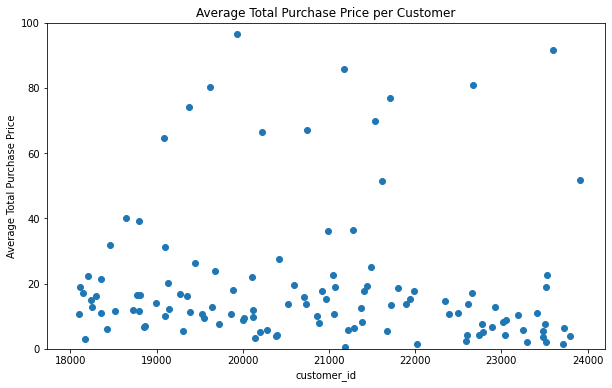

In [61]:
plt.figure(figsize = (10, 6))
plt.scatter(largest_pivot.index, largest_pivot['total_price'])

plt.ylim(0,100)

plt.xlabel('customer_id')
plt.ylabel('Average Total Purchase Price')

plt.title('Average Total Purchase Price per Customer')
plt.show()


Rata-rata pembelian berada di sekitar nilai \$20\. Hanya ada 1 nilai saja yang berada jauh di atas, yaitu dari *customer_id: 18025* dengan rata-rata pembelian mencapai \$77000\.

#### Rata-rata Item Dalam Keranjang

In [62]:
avg_items_in_cart = pd.pivot_table(largest_store, index = 'customer_id', values = 'quantity', aggfunc = 'mean').sort_values(
    by = 'quantity', ascending = False)
avg_items_in_cart

,quantity
customer_id,
18025,74214.000000
23129,1107.000000
19527,565.666667
18904,215.000000
21706,107.000000
...,...
22586,1.000000
21182,1.000000
22018,1.000000


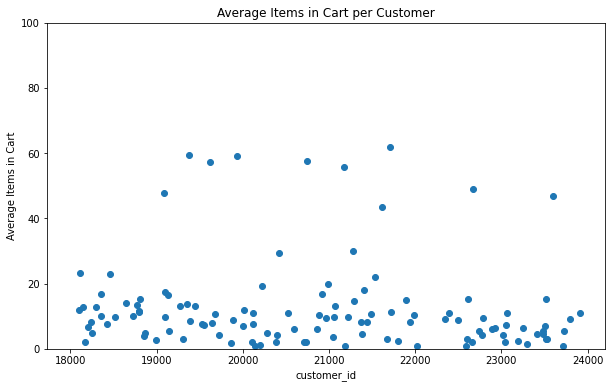

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_items_in_cart.index, avg_items_in_cart['quantity'])

plt.ylim(0,100)

plt.xlabel('customer_id')
plt.ylabel('Average Items in Cart')

plt.title('Average Items in Cart per Customer')
plt.show()


In [64]:
largest_store['quantity'].sum(), avg_items_in_cart['quantity'].sum()

(100717, 77711.75119120996)

Rata-rata jumlah item dalam keranjang untuk setiap pelanggan tidak lebih dari 20 item. Seperti yang kita ketahui sebelumnya, ada 1 pelanggan yang memang sepertinya melakukan pembelian dengan jumlah besar, yaitu *customer:18025* dengan jumlah 74000 item. Mungkin pelanggan tersebut membeli barang yang jumlahnya memang dibutuhkan sangat banyak seperti paku atau baut?

#### Persentase Pelanggan Program Loyalty dan Non Program

In [65]:
largest_store['purchase_id'].count()

1775

In [66]:
# Menghitung jumlah pelanggan dalam setiap kategori
loyalty_counts = largest_store['loyalty_program'].value_counts()

# Menghitung persentase pelanggan yang merupakan anggota program loyalitas dan bukan
loyalty_percentage = loyalty_counts / loyalty_counts.sum() * 100

# Menampilkan hasil
print("Percentage of Customers Members of the Loyalty Program:", loyalty_percentage[1], "%")
print("Percentage of Customers Non Loyalty Program Members:", loyalty_percentage[0], "%")


Percentage of Customers Members of the Loyalty Program: 28.507042253521124 %
Percentage of Customers Non Loyalty Program Members: 71.49295774647887 %


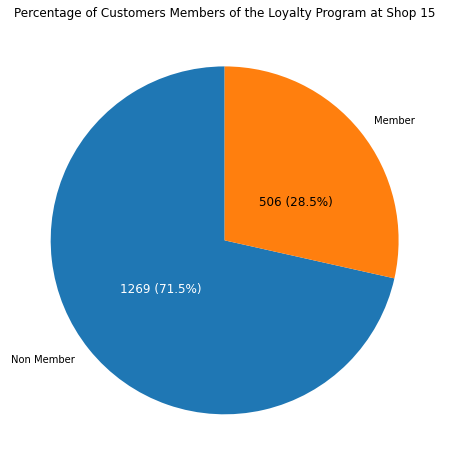

In [67]:
plt.figure(figsize = (8, 8))
plt.pie(loyalty_counts, labels = ['Non Member', 'Member'], startangle = 90)

plt.gca().set_aspect('equal')
plt.text(-0.6, -0.3, f"{loyalty_counts[0]} ({loyalty_counts[0] / loyalty_counts.sum() * 100:.1f}%)", fontsize = 12, color = 'white')
plt.text(0.2, 0.2, f"{loyalty_counts[1]} ({loyalty_counts[1] / loyalty_counts.sum() * 100:.1f}%)", fontsize = 12)

plt.title('Percentage of Customers Members of the Loyalty Program at Shop 15')
plt.show()

Dari 1775 transaksi di **Shop 15**, 71.5% merupakan transaksi yang dilakukan oleh pelanggan non anggota program loyalty, sedangkan sisanya sekitar 28.5% adalah transaksi yang dilakukan oleh pelanggan anggota program loyalty toko.

#### Persentase Pelanggan yang Melakukan Pembelian Berulang

In [68]:
transaction_counts = largest_store['customer_id'].value_counts()

In [69]:
repeat_customer_count = len(transaction_counts[transaction_counts > 1])

In [70]:
repeat_customer_percentage = (repeat_customer_count / len(largest_store['customer_id'].unique())) * 100
repeat_customer_percentage

88.70967741935483

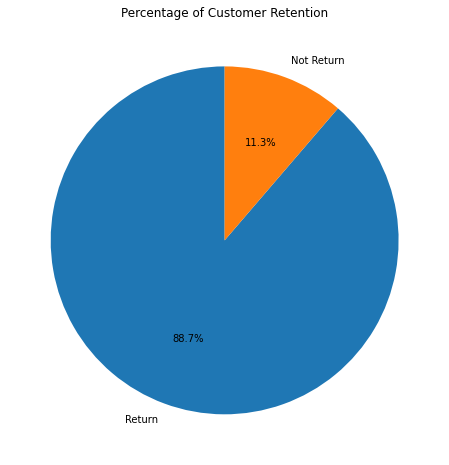

In [71]:
non_repeat_customer_count = len(largest_store['customer_id'].unique()) - repeat_customer_count

plt.figure(figsize = (8, 8))
plt.pie([repeat_customer_count, non_repeat_customer_count], labels = ['Return', 'Not Return'], 
        autopct = '%1.1f%%', startangle = 90)

plt.title('Percentage of Customer Retention')
plt.show()


Dari grafik visualisasi di atas, kita dapat melihat bahwa ada 88.7% pelanggan yang melakukan pembelian kembali di **Shop 15**, dan sisanya 11.3% tidak kembali. Ternyata meskipun tidak banyak pelanggan yang menjadi anggota program loyalitas toko, namun retensi pelanggan masih cukup tinggi.

#### Total Penjualan

In [72]:
# Menghitung total penjualan setiap toko
largest_store['total_sales'] = largest_store['total_price']
largest_store.loc[largest_store['loyalty_program'] == 1, 'total_sales'] += 20
largest_store

/tmp/ipykernel_27/2617459008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largest_store['total_sales'] = largest_store['total_price']
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,total_sales
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,21873,0.42,2.10,22.10
23,537868,21873,23,2016-12-08 16:49:00,18112,0,Shop 15,21873,0.42,9.66,9.66
88,542360,22195,1,2017-01-27 12:40:00,20380,0,Shop 15,22195,1.65,1.65,1.65
132,540268,22195,11,2017-01-06 11:25:00,19137,0,Shop 15,22195,1.65,18.15,18.15
166,540951,22195,14,2017-01-12 13:10:00,18792,0,Shop 15,22195,1.65,23.10,23.10
...,...,...,...,...,...,...,...,...,...,...,...
103940,541984,21132,3,2017-01-24 15:48:00,18796,0,Shop 15,21132,4.25,12.75,12.75
103995,542398,90146,1,2017-01-27 15:36:00,18853,0,Shop 15,90146,7.50,7.50,7.50
104005,543809,44089C,7,2017-02-13 13:52:00,22774,1,Shop 15,44089C,0.42,2.94,22.94
104118,542398,90016A,2,2017-01-27 15:36:00,18853,0,Shop 15,90016A,8.32,16.64,16.64


In [73]:
largest_store['total_sales'].sum()

122955.53

In [74]:
largest_store.loc[largest_store['loyalty_program'] == 1]['total_sales'].describe()

count     506.000000
mean       37.274980
std       130.680496
min        20.220000
25%        22.550000
50%        25.680000
75%        30.425000
max      2210.450000
Name: total_sales, dtype: float64

In [75]:
largest_store.loc[largest_store['loyalty_program'] == 0]['total_sales'].describe()

count     1269.000000
mean        82.028676
std       2166.361377
min          0.190000
25%          7.470000
50%         11.660000
75%         19.550000
max      77182.560000
Name: total_sales, dtype: float64

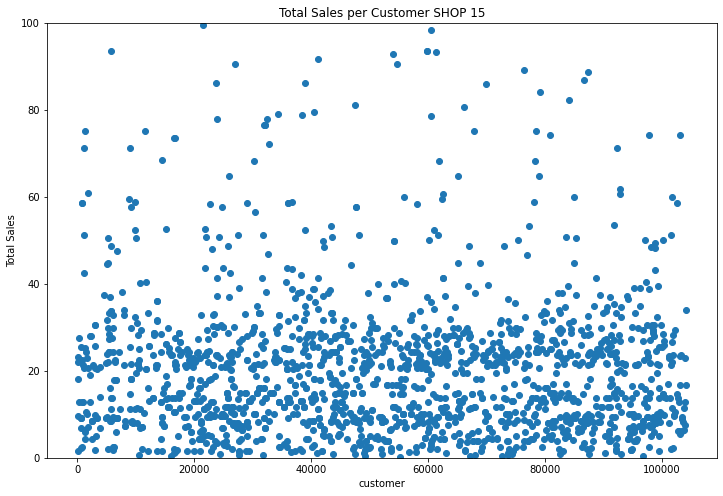

In [76]:
plt.figure(figsize=(12, 8))
plt.scatter(largest_store.index, largest_store['total_sales'])

plt.ylim(0,100)

plt.xlabel('customer')
plt.ylabel('Total Sales')

plt.title('Total Sales per Customer SHOP 15')
plt.show()

Kita mencoba menghitung total penjualan dari **Shop 15** dimana total penjualan ini merupakan hasil pendapatan dari penjualan barang/item di toko, serta dari penjualan *member* program loyalitas toko. Hasilnya, kebanyakan pelanggan mengeluarkan uang tidak sampai \$40 untuk setiap transaksi. Selain itu, jika dibandingkan pendapatan antara transaksi dengan pelanggan anggota program loyalitas dan yang bukan, kita lebih banyak mendapat keuntungan dari yang bukan anggota. Hal ini sejalan dengan parameter sebelumnya yang kita hitung dimana memang tidak banyak anggota program loyalitas di **Shop 15**. Mungkinkah program loyalitas tersebut tidak populer sehingga orang tidak tertarik? Atau karena harganya terlalu mahal? Atau bisa juga tidak banyak pelanggan yang mengetahui mengenai program loyalitas toko tersebut?

Secara total, toko cabang **Shop 15** mendapatkan total penjualan sebesar \$123000\.

### Menghitung Parameter untuk Toko Cabang Selain Cabang Terbesar

Setelah melihat beberapa metrik penjualan untuk toko cabang **Shop 15** sebagai toko cabang terbesar, maka sekarang kita juga perlu melakukan analisa terhadap toko cabang lainnya.

In [77]:
other_store = merged_filtered[merged_filtered['shop_id'] != 'Shop 15']
other_store

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42
5,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,21873,0.42
6,540838,21873,11,2017-01-11 15:13:00,19541,0,Shop 4,21873,0.42
8,544651,21873,71,2017-02-22 12:51:00,19373,0,Shop 17,21873,0.42
...,...,...,...,...,...,...,...,...,...
104294,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38
104298,539988,46138B,1,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95
104300,542731,17028J,5,2017-01-31 15:27:00,19279,0,Shop 0,17028J,0.42


#### Jumlah Pelanggan Unik

In [78]:
other_store['customer_id'].nunique()

1685

In [79]:
cust_unique = pd.pivot_table(other_store, index =  'shop_id', values = 'customer_id', aggfunc = 'nunique').sort_values(
    by = 'customer_id', ascending = False)
cust_unique

,customer_id
shop_id,
Shop 0,133
Shop 5,132
Shop 19,129
Shop 7,128
Shop 17,128
Shop 11,127
Shop 26,126
Shop 1,126
Shop 22,125


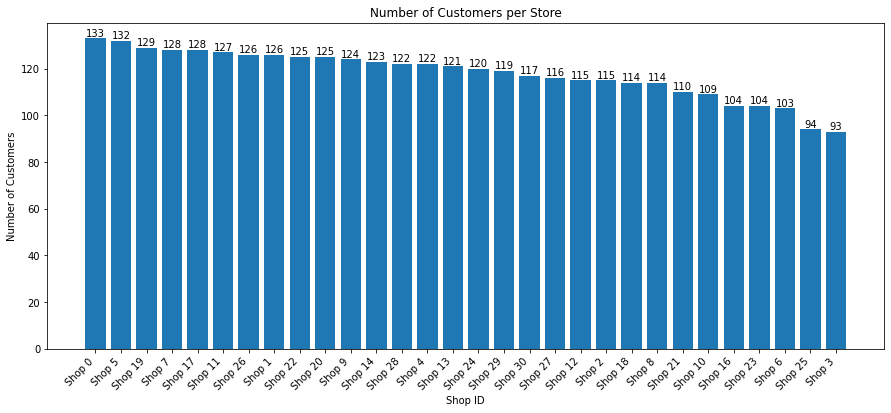

In [80]:
plt.figure(figsize = (15, 6))
bars = plt.bar(cust_unique.index, cust_unique['customer_id'])

plt.xlabel('Shop ID')
plt.ylabel('Number of Customers')

plt.title('Number of Customers per Store')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()


Grafik visualisasi di atas menunjukkan jumlah pelanggan unik di setiap toko cabang. Dari total 1685 pelanggan unik, **Shop 0** dan **Shop 5** memiliki pelanggan unik paling banyak di antara toko cabang lainnya, yaitu 133 pelanggan dan 132 pelanggan.

Hal ini cukup menarik karena sebelumnya, **Shop 15** yang kita anggap sebagai cabang terbesar, hanya memiliki 124 pelanggan unik saja.

#### Besaran Rata-rata Pembelian

In [81]:
# Membuat kolom baru 'total_price' yang menghitung total harga pembelian untuk setiap baris
other_store['total_price'] = other_store['quantity'] * other_store['price_per_one']

# Membuat pivot table untuk menghitung rata-rata total harga pembelian masing-masing customer unik
other_pivot = pd.pivot_table(other_store, index = ['customer_id', 'shop_id', 'loyalty_program'], 
                             values = 'total_price', aggfunc = 'mean').sort_values(
    by = 'total_price', ascending = False)

/tmp/ipykernel_27/2982199391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_store['total_price'] = other_store['quantity'] * other_store['price_per_one']


In [82]:
other_pivot

,,,total_price
customer_id,shop_id,loyalty_program,
18025,Shop 21,0,77184.6400
21428,Shop 20,0,5117.7250
18434,Shop 5,0,3791.8500
23766,Shop 30,1,3202.1000
23781,Shop 5,1,2256.0175
...,...,...,...
21706,Shop 27,0,0.3800
18182,Shop 29,0,0.3800
19351,Shop 9,0,0.3800


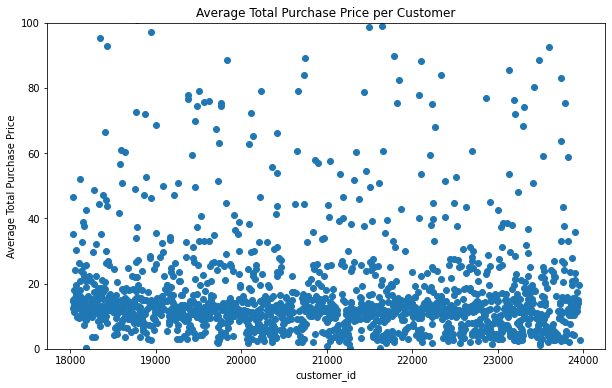

In [83]:
avg_revenue_other = pd.pivot_table(other_store, index = 'customer_id', values = 'total_price', aggfunc = 'mean').sort_values(
    by = 'total_price', ascending = False)

plt.figure(figsize=(10, 6))
plt.scatter(avg_revenue_other.index, avg_revenue_other['total_price'])

plt.ylim(0,100)

plt.xlabel('customer_id')
plt.ylabel('Average Total Purchase Price')

plt.title('Average Total Purchase Price per Customer')
plt.show()


Pembelian rata-rata per pelanggan tidak melebihi \$20\. Namun, sama kondisinya seperti **Shop 15**, pada **Shop 21** terdapat pelanggan anomali yang membeli dalam jumlah sangat banyak, yaitu *customer_id:18025*, sehingga jumlah pembeliannya pun sangat tinggi dibandingkan pelanggan pada toko cabang lainnya.

#### Rata-rata Item Dalam Keranjang

In [84]:
average_items_in_cart = pd.pivot_table(other_store, index = ['customer_id', 'shop_id', 'item_id'], values = 'quantity', aggfunc = 'mean').sort_values(
    by = 'quantity', ascending = False)
average_items_in_cart

quantity
customer_id shop_id item_id          
18025       Shop 21 23166     74216.0
21517       Shop 17 84347      9361.0
23766       Shop 30 22053      3905.0
21428       Shop 20 21108      3113.0
22433       Shop 3  84077      2879.0
...                               ...
22893       Shop 9  22117         1.0
20285       Shop 5  21447         1.0
                    21459         1.0
22893       Shop 9  85169B        1.0
20990       Shop 6  21754         1.0

[44455 rows x 1 columns]

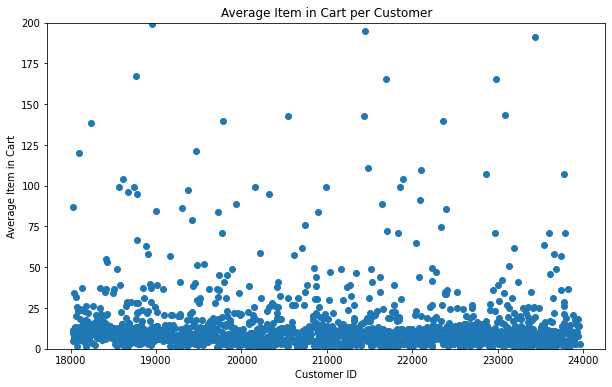

In [85]:
avg_items_cart_other = pd.pivot_table(other_store, index = 'customer_id', values = 'quantity', aggfunc = 'mean').sort_values(
    by = 'quantity', ascending = False)

plt.figure(figsize=(10, 6))
plt.scatter(avg_items_cart_other.index, avg_items_cart_other['quantity'])

plt.ylim(0,200)

plt.xlabel('Customer ID')
plt.ylabel('Average Item in Cart')

plt.title('Average Item in Cart per Customer')
plt.show()


In [86]:
other_store[other_store['shop_id'] == 'Shop 21']['quantity'].sum()

87042

Rata-rata jumlah item dalam keranjang untuk setiap pelanggan tidak lebih dari 25 item. Seperti yang kita ketahui sebelumnya, ada 1 pelanggan yang memang sepertinya melakukan pembelian dengan jumlah besar di **Shop 21**, yaitu *customer:18025* dengan jumlah 74000 item. Sepertinya pelanggan tersebut membutuhkan barang dalam jumlah besar hingga membeli dengan jumlah sangat banyak di kedua toko cabang.

Meskipun **Shop 21** memiliki jumlah item dalam keranjang paling banyak (sekitar 87000), namun ternyata **Shop 15** lebih unggul dengan total sekitar 100000 item.

#### Persentase Pelanggan Program Loyalty dan Non Program

In [87]:
loyalty_counts = other_store['loyalty_program'].value_counts()

loyalty_percentage = loyalty_counts / loyalty_counts.sum() * 100

print("Percentage of Customers Members of the Loyalty Program:", loyalty_percentage[1], "%")
print("Percentage of Customers Non Loyalty Program Members:", loyalty_percentage[0], "%")


Percentage of Customers Members of the Loyalty Program: 32.37526994233809 %
Percentage of Customers Non Loyalty Program Members: 67.6247300576619 %


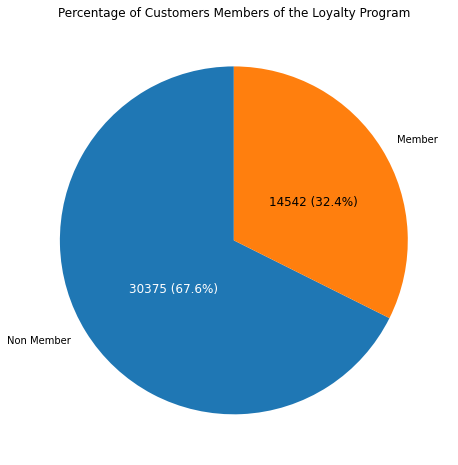

In [88]:
plt.figure(figsize=(8, 8))
plt.pie(loyalty_counts, labels=['Non Member', 'Member'], startangle=90)

plt.gca().set_aspect('equal')
plt.text(-0.6, -0.3, f"{loyalty_counts[0]} ({loyalty_counts[0] / loyalty_counts.sum() * 100:.1f}%)", fontsize=12, color='white')
plt.text(0.2, 0.2, f"{loyalty_counts[1]} ({loyalty_counts[1] / loyalty_counts.sum() * 100:.1f}%)", fontsize=12)

plt.title('Percentage of Customers Members of the Loyalty Program')
plt.show()


In [89]:
# Menghitung persentase pelanggan yang merupakan anggota program loyalitas dan bukan untuk setiap toko (shop_id)
loyalty_counts_per_shop = other_store.groupby(['shop_id', 'loyalty_program'])['customer_id'].count()
total_customers_per_shop = other_store.groupby('shop_id')['customer_id'].count()
loyalty_percentage_per_shop = (loyalty_counts_per_shop / total_customers_per_shop) * 100
loyalty_percentage_per_shop.sort_values()

shop_id  loyalty_program
Shop 28  1                  21.935484
Shop 4   1                  23.803191
Shop 19  1                  25.032765
Shop 27  1                  25.444957
Shop 10  1                  25.483871
Shop 20  1                  26.864802
Shop 30  1                  27.485030
Shop 6   1                  28.544776
Shop 14  1                  28.944099
Shop 29  1                  29.096774
Shop 5   1                  29.199278
Shop 7   1                  32.427307
Shop 12  1                  32.668329
Shop 17  1                  32.973702
Shop 25  1                  33.204334
Shop 22  1                  33.810069
Shop 13  1                  33.871970
Shop 9   1                  33.917775
Shop 0   1                  34.292866
Shop 23  1                  34.752268
Shop 24  1                  35.005701
Shop 8   1                  35.509326
Shop 1   1                  36.783626
Shop 3   1                  36.851363
Shop 16  1                  37.096774
Shop 26  1               

Dari 44917 data transaksi, terdapat 67.6% atau sebanyak 30375 transaksi yang dilakukan oleh pelanggan non anggota program loyalitas. Jika dilihat persebarannya setiap toko, pelanggan non anggota program loyalitas dari **Shop 28** merupakan yang paling banyak, yaitu sekitar 78%. Sedangkan **Shop 2**  memiliki transaksi dari pelanggan anggota program loyalitas toko yang paling banyak, yaitu sekitar 45%.

#### Persentase Pelanggan yang Melakukan Pembelian Berulang

In [90]:
trans_counts = other_store['customer_id'].value_counts()

In [91]:
repeat_cust_count = len(trans_counts[trans_counts > 1])

In [92]:
repeat_cust_percentage = (repeat_cust_count / len(other_store['customer_id'].unique())) * 100
repeat_cust_percentage

94.59940652818992

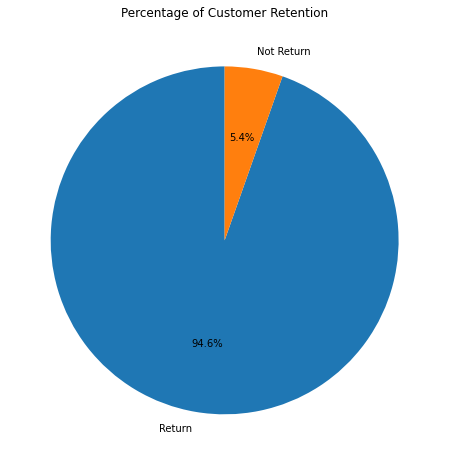

In [93]:
non_repeat_cust_count = len(other_store['customer_id'].unique()) - repeat_cust_count

plt.figure(figsize=(8, 8))
plt.pie([repeat_cust_count, non_repeat_cust_count], labels=['Return', 'Not Return'], autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Customer Retention')
plt.show()


In [94]:
# Filter data untuk Shop 0
filtered_data = other_store[other_store['shop_id'] == 'Shop 0']
transaction= filtered_data['customer_id'].value_counts()

repeat_customers = len(transaction[transaction > 1])

repeat_customer_percent = (repeat_customers / len(filtered_data['customer_id'].unique())) * 100
repeat_customer_percent


86.46616541353383

Sebanyak 94.6% pelanggan di toko cabang selain **Shop 15** melakukan pembelian berulang. Jika melihat contoh salah satu toko dengan pelanggan terbanyak, yaitu **Shop 0**, terdapat sekitar 86.5% pelanggan yang kembali berbelanja di toko cabang tersebut.

#### Total Penjualan

In [95]:
other_store['total_sales'] = other_store['total_price']
other_store.loc[other_store['loyalty_program'] == 1, 'total_sales'] += 20

/tmp/ipykernel_27/2078260655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_store['total_sales'] = other_store['total_price']
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [96]:
total_sales_per_shop = other_store.groupby('shop_id')['total_sales'].sum()
total_sales_per_shop.sort_values(ascending = False)

shop_id
Shop 21    105616.65
Shop 5      73568.38
Shop 13     51314.96
Shop 20     49415.84
Shop 4      48284.30
Shop 24     46818.25
Shop 26     44591.96
Shop 30     43977.47
Shop 23     42720.07
Shop 25     42402.45
Shop 29     42182.46
Shop 10     41488.60
Shop 9      39721.51
Shop 18     39685.43
Shop 0      39650.62
Shop 2      39451.54
Shop 28     39231.17
Shop 22     38918.37
Shop 1      38686.09
Shop 8      38409.73
Shop 3      37447.38
Shop 11     37445.40
Shop 7      36437.53
Shop 17     35271.73
Shop 14     35183.36
Shop 19     32914.44
Shop 27     32579.45
Shop 16     31929.41
Shop 6      31636.61
Shop 12     30307.43
Name: total_sales, dtype: float64

In [97]:
other_store.loc[other_store['loyalty_program'] == 1]['total_sales'].describe()

count    14542.000000
mean        38.414109
std         86.804807
min         20.060000
25%         23.600000
50%         28.280000
75%         34.757500
max       3841.620000
Name: total_sales, dtype: float64

In [98]:
other_store.loc[other_store['loyalty_program'] == 0]['total_sales'].describe()

count    30375.000000
mean        23.989156
std        448.513562
min          0.030000
25%          5.800000
50%         10.200000
75%         16.950000
max      77184.640000
Name: total_sales, dtype: float64

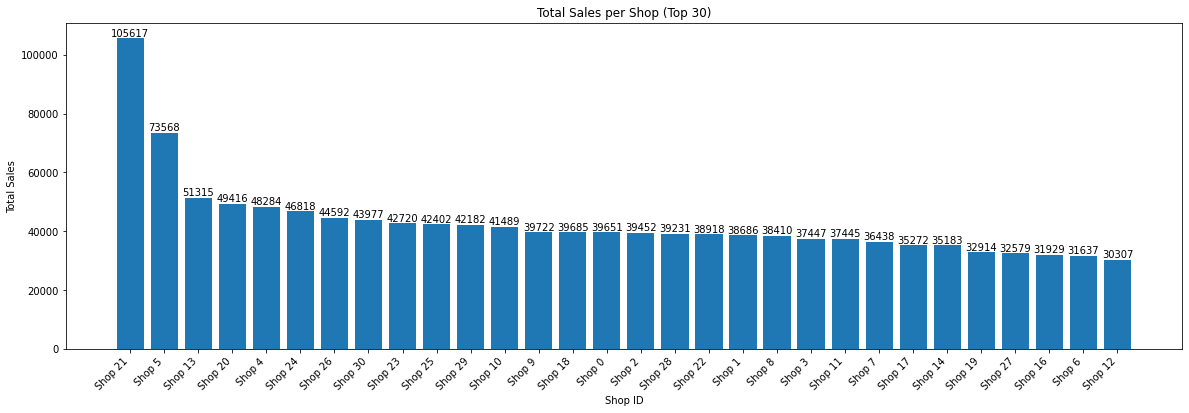

In [99]:
top_30_shops = other_store.groupby('shop_id')['total_sales'].sum().nlargest(30)

plt.figure(figsize=(20, 6))
bars = plt.bar(top_30_shops.index, top_30_shops.values)

plt.xlabel('Shop ID')
plt.ylabel('Total Sales')

plt.title('Total Sales per Shop (Top 30)')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(round(height)), ha='center', va='bottom')

plt.show()


Melalui grafik visualisasi di atas, kita dapat melihat bahwa total penjualan dari **Shop 21** sangat tinggi (sekitar \$105000\) dan hampir sama tingginya dengan **Shop 15** (dengan total penjualan sekitar \$123000\). Sedangkan toko cabang lainnya yang juga memiliki total penjualan tertinggi adalah **Shop 5**.

Berbeda dengan **Shop 15**, kondisi total penjualan di toko cabang lain menunjukkan bahwa rata-rata pendapatan dari transaksi pelanggan anggota program loyalitas jauh lebih tinggi dibandingkan pelanggan non-anggota yang jumlah populasinya lebih banyak. Sepertinya para pelanggan anggota program di toko cabang lainnya lebih banyak berbelanja dibandingkan di **Shop 15**.

### Kesimpulan dan Langkah Selanjutnya

Pada tahap analisa data, kita mendapatkan kesimpulan sebagai berikut:

1. Kita menentukan toko cabang yang terbesar, yang diartikan sebagai toko yang paling sering muncul pada dataset kita (memiliki baris paling banyak), yaitu **Shop 15**. Maka, kita akan mencoba melihat beberapa parameter pada toko cabang tersebut:
 * Terdapat 124 pelanggan unik di **Shop 15**.
 * Rata-rata pembeliannya berada di sekitar nilai \$20\. Hanya ada 1 nilai saja yang berada jauh di atas, yaitu dari *customer_id: 18025* dengan rata-rata pembelian mencapai \$77000\. 
 * Rata-rata jumlah item dalam keranjang untuk setiap pelanggan tidak lebih dari 20 item. kecuali untuk 1 pelanggan yang memang sepertinya melakukan pembelian dengan jumlah besar, yaitu customer:18025 dengan jumlah 74000 item. 
 * Dari 1775 transaksi di **Shop 15**, 71.5% merupakan transaksi yang dilakukan oleh pelanggan non-anggota program loyalty, sedangkan sisanya sekitar 28.5% adalah transaksi yang dilakukan oleh pelanggan anggota program loyalty toko.
 * Terdapat 88.7% pelanggan yang melakukan pembelian kembali di **Shop 15**, dan sisanya 11.3% tidak kembali. Ternyata meskipun tidak banyak pelanggan yang menjadi anggota program loyalitas toko, namun retensi pelanggan masih cukup tinggi.
 * Total penjualan dari **Shop 15** sebesar \$123000\. Total penjualan ini merupakan hasil pendapatan dari penjualan barang/item di toko, serta dari penjualan *member* program loyalitas toko. Jika dibandingkan pendapatan antara transaksi dengan pelanggan anggota program loyalitas dan yang bukan, kita lebih banyak mendapat keuntungan dari yang bukan anggota. Hal ini sejalan dengan parameter sebelumnya yang kita hitung dimana memang tidak banyak anggota program loyalitas di **Shop 15**. Mungkinkah program loyalitas tersebut tidak populer sehingga orang tidak tertarik? Atau karena harganya terlalu mahal? Atau bisa juga tidak banyak pelanggan yang mengetahui mengenai program loyalitas toko tersebut?

2. Setelah melihat beberapa metrik penjualan untuk toko cabang **Shop 15** sebagai toko cabang terbesar, maka sekarang kita juga perlu melakukan analisa terhadap toko cabang lainnya.
 * Jumlah pelanggan unik di keseluruhan toko cabang selain **Shop 15** 1685 pelanggan unik. Dimana **Shop 0** memiliki pelanggan unik paling banyak di antara toko cabang lainnya, yaitu 133 pelanggan.
 * Pembelian rata-rata per pelanggan tidak melebihi \$20\. Namun, sama kondisinya seperti **Shop 15**, pada **Shop 21** terdapat pelanggan anomali yang membeli dalam jumlah sangat banyak, yaitu *customer_id:18025*, sehingga jumlah pembeliannya pun sangat tinggi dibandingkan pelanggan pada toko cabang lainnya.
 * Rata-rata jumlah item dalam keranjang untuk setiap pelanggan tidak lebih dari 25 item. Seperti yang kita ketahui sebelumnya, ada 1 pelanggan yang memang sepertinya melakukan pembelian dengan jumlah besar di **Shop 21**, yaitu customer:18025 dengan jumlah 74000 item. Meskipun **Shop 21** memiliki jumlah item dalam keranjang paling banyak (sekitar 87000), namun ternyata **Shop 15** lebih unggul dengan total sekitar 100000 item.
 * Dari 44917 data transaksi, terdapat 67.6% atau sebanyak 30375 transaksi yang dilakukan oleh pelanggan non-anggota program loyalitas. Jika dilihat persebarannya setiap toko, pelanggan non anggota program loyalitas dari **Shop 28** merupakan yang paling banyak, yaitu sekitar 78%. Sedangkan **Shop 2** memiliki transaksi dari pelanggan anggota program loyalitas toko yang paling banyak, yaitu sekitar 45%.
 * Sebanyak 94.6% pelanggan di toko cabang selain **Shop 15** melakukan pembelian berulang. Jika melihat contoh salah satu toko dengan pelanggan terbanyak, yaitu **Shop 0**, terdapat sekitar 86.5% pelanggan yang kembali berbelanja di toko cabang tersebut.
 * Total penjualan dari **Shop 21** sangat tinggi (sekitar \$105000\) dan hampir sama tingginya dengan **Shop 15** (dengan total penjualan sekitar \$123000\). Namun, berbeda dengan **Shop 15**, kondisi total penjualan di toko cabang lain menunjukkan bahwa rata-rata pendapatan dari transaksi pelanggan anggota program loyalitas jauh lebih tinggi dibandingkan pelanggan non-anggota yang jumlah populasinya lebih banyak. Sepertinya para pelanggan anggota program di toko cabang lainnya lebih banyak berbelanja dibandingkan di **Shop 15**.

## Menguji Hipotesis

Setelah melihat analisa data, kita akan menguji hipotesis yang telah kita ajukan pada tahap awal penelitian ini, yaitu: **Ukuran pembelian rata-rata bagi anggota program loyalitas lebih tinggi daripada bagi non-anggota**.

Kita akan melakukan pengujian dengan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan bandingkan hasil nilai p dengan 'alpha'. Tingkat signifikansi atau nilai 'alpha' yang ditetapkan adalah nilai standar yaitu 0.05.

H0 : Tidak ada perbedaan ukuran pembelian rata-rata antara anggota program loyalitas dan non-anggota

H1: Terdapat perbedaan ukuran pembelian rata-rata antara anggota program loyalitas dan non-anggota

In [100]:
merged_filtered['total_price'] = merged_filtered['quantity'] * merged_filtered['price_per_one']
merged_filtered['total_sales'] = merged_filtered['total_price']
merged_filtered.loc[merged_filtered['loyalty_program'] == 1, 'total_sales'] += 20

/tmp/ipykernel_27/2052375387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered['total_price'] = merged_filtered['quantity'] * merged_filtered['price_per_one']
/tmp/ipykernel_27/2052375387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered['total_sales'] = merged_filtered['total_price']
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [101]:
loyal = merged_filtered[merged_filtered['loyalty_program'] == 1]
non_loyal = merged_filtered[merged_filtered['loyalty_program'] == 0]

In [102]:
loyal

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,total_sales
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,14.70,34.70
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,21873,0.42,2.10,22.10
17,539252,21873,35,2016-12-16 14:17:00,23423,1,Shop 18,21873,0.42,14.70,34.70
30,542420,21873,1,2017-01-27 18:05:00,22859,1,Shop 22,21873,0.42,0.42,20.42
41,538991,21873,35,2016-12-15 11:53:00,23190,1,Shop 25,21873,0.42,14.70,34.70
...,...,...,...,...,...,...,...,...,...,...,...
104286,544160,79406,5,2017-02-16 12:49:00,22173,1,Shop 9,79406,0.22,1.10,21.10
104287,543610,71510,11,2017-02-10 14:30:00,22104,1,Shop 7,71510,0.85,9.35,29.35
104289,539988,16206B,1,2016-12-23 16:06:00,23795,1,Shop 14,16206B,1.25,1.25,21.25
104297,538852,90058B,35,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,13.30,33.30


In [103]:
non_loyal

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,total_sales
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.62,4.62
5,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,21873,0.42,0.42,0.42
6,540838,21873,11,2017-01-11 15:13:00,19541,0,Shop 4,21873,0.42,4.62,4.62
8,544651,21873,71,2017-02-22 12:51:00,19373,0,Shop 17,21873,0.42,29.82,29.82
10,540480,21873,11,2017-01-07 15:27:00,18159,0,Shop 19,21873,0.42,4.62,4.62
...,...,...,...,...,...,...,...,...,...,...,...
104284,544070,84859C,1,2017-02-15 14:19:00,21049,0,Shop 20,84859C,5.95,5.95,5.95
104288,542216,16206B,4,2017-01-26 12:29:00,20590,0,Shop 10,16206B,1.25,5.00,5.00
104294,539009,79329,5,2016-12-15 13:24:00,18900,0,Shop 28,79329,1.65,8.25,8.25
104300,542731,17028J,5,2017-01-31 15:27:00,19279,0,Shop 0,17028J,0.42,2.10,2.10


In [104]:
loyal['customer_id'].nunique()

574

In [105]:
non_loyal['customer_id'].nunique()

1143

In [106]:
sample_1 = loyal.dropna()['total_sales']
sample_1.mean()

38.375804758107385

In [107]:
sample_2 = non_loyal.dropna()['total_sales']
sample_2.mean()

26.316679623309316

Dalam kasus ini, jumlah sampel anggota program loyalitas (574) dan non-anggota program loyalitas (1143) cukup besar. Namun, untuk mengetahui apakah varians dari dua atau lebih sampel data sama atau tidak, tidak cukup hanya dengan melihat jumlah sampel. Jumlah sampel hanyalah satu faktor yang mempengaruhi variabilitas data, karena itu kita perlu menjalankan uji Levene sebelum melanjutkan menguji hipotesis kita.
Uji Levene digunakan untuk menguji apakah varians dari kelompok-kelompok data yang dibandingkan adalah sama atau berbeda secara signifikan, sehingga dapat membantu kita untuk menentukan metode statistik yang tepat untuk digunakan dalam analisis data.

In [114]:
from scipy.stats import levene

statistic, p_value = levene(sample_1, sample_2)
print("Hasil uji Levene:")
print("P_Value:", p_value)


Hasil uji Levene:
P_Value: 0.2307115567595883


Uji Levene menunjukkan hasil p_value-nya > 0.05. Hal ini menunjukkan bahwa perbedaan varians antara kelompok anggota program loyalitas dan non-anggota program loyalitas tidak signifikan secara statistik. Ini menunjukkan bahwa varians populasi sama.
Karena itu, kita bisa menjalankan metode *ttest_ind* tanpa perlu menambahkan parameter *equal_var* (dari *equal variance* atau varians yang setara yang menentukan apakah varians dari kedua populasi harus dianggap setara atau tidak).

In [115]:
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)
results.pvalue

0.017129032204043652

In [116]:
if (results.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


Setelah melakukan pengujian, hasil uji statistik menunjukkan bahwa p-value < alpha, dan hasil uji hipotesis menyatakan "Tolak null hipotesis," maka kita dapat menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa ada perbedaan antara rata - rata pembelian antara anggota program loyalitas dan non-anggota program loyalitas.

Maka dari itu, hipotesis kita yang menyatakan bahwa ukuran pembelian rata-rata bagi anggota program loyalitas lebih tinggi daripada bagi non-anggota dapat diterima sepenuhnya. Kenapa demikian? Karena, selain hasil uji statistik menunjuukan bahwa terdapat perbedaan untuk ukuran rata-rata pembeliannya, kita juga dapat melihat hasil perhitungan rata-ratanya dimana rata-rata pembelian anggota program loyalitas lebih tinggi dibandingkan non-anggota program.

## Kesimpulan Umum dan Rekomendasi

Setelah mencoba mengolah dan menganalisa data, maka kita dapat menarik kesimpulan:

Dataset yang kita miliki terbagi dalam 2 tabel, yaitu:
 * tabel `retail` yang berisi data mengenai penjualan, memiliki 105335 baris dan 7 kolom
 * tabel `product` yang berisi data mengenai produk, memiliki 3159 baris dan 2 kolom

Kita memiliki beberapa masalah pada tabel yang kita miliki, dan telah diperbaiki pada tahap pra-pemrosesan data. Masalah tersebut adalah:

 * Gaya penulisan nama dan tipe data beberapa kolom yang bermasalah, dan sudah diperbaiki. Gaya penulisan nama kolom pada dataset kita yang semula tidak mengikuti aturan, sudah diperbaiki sesuai dengan aturan gaya penulisan yang baik, yaitu: semua karakter harus menggunakan huruf kecil dan nama kolom yang terdiri dari dua kata menggunakan gaya penulisan snake_case. Untuk kolom-kolom dengan tipe data bermasalah adalah:
    * kolom `purchase_date` pada tabel `retail` seharusnya tipe datanya adalah datetime bukan object
    * kolom `customer_id` pada tabel `retail` seharusnya tipe datanya adalah object bukan float

 * Tabel `retail` memiliki nilai yang hilang cukup banyak di kolom customer_id (sebanyak 36210 atau sekitar 35% dari keseluruhan data).
 * Kolom `quantity` pada tabel `retail` memiliki nilai anomali, dimana terdapat nilai minus sebanyak 2118 data (sekitar 2%). Seharusnya kolom ini tidak boleh bernilai minus dengan asumsi tidak mungkin ada pembelian jumlah minus.
 * Pada kolom `price_per_one` pada tabel `product` terdapat nilai 0.00 sebanyak 382 data (sekitar 12%). Nilai 0.00 pada kolom yang menunjukkan harga barang sepertinya sedikit aneh. 
 * Langkah awal yang dilakukan adalah mengubah nilai yang hilang pada kolom customer_id menjadi 0 (nol) dengan asumsi mereka adalah pelanggan yang tidak diketahui. Namun setelah dianalisa lebih lanjut, terdapat 2719 data dari nilai yang hilang tersebut yang terjadi bersamaan dengan adanya nilai 0 pada kolom lain, seperti quantity dan price_per_one, dan diputuskan untuk menghapus data ini dengan pertimbangan bahwa tidak ada informasi tentang pelanggan yang melakukan pembelian karena tidak ada data mengenai jumlah pembeliannya.
 * Selain itu, kita juga menghapus data-data dengan kondisi sebagai berikut:
    * `price_per_one` bernilai 0 dengan quantity 0. Meskipun terdapat informasi lainnya, namun data ini menunjukkan bahwa tidak ada transaksi yang dilakukan.
    * `price_per_one` bernilai 0. Data ini tidak memenuhi kriteria karena harga per itemnya 0. Harga barang bernilai 0 dapat mengacaukan analisis data, apalagi ketika kita ingin melihat revenue atau rata-rata pembelian(penjualan).
    * `customer_id` bernilai 0 (tidak diketahui). Kolom customer_id sebaiknya tidak bernilai 0 atau unknown, karena customer_id adalah nilai unik yang digunakan untuk mengidentifikasi pelanggan. Meskipun di tahap awal, kita masih mempertahankan data ini, sebaiknya data ini dihapus. Jika customer_id bernilai 0, maka berarti bahwa pelanggan tersebut tidak dapat diidentifikasi dan kemungkinan dapat mempersulit proses analisis data.

Sebelum transformasi data, terdapat 1033 data yang terduplikasi pada tabel retail dan telah dihapus.

Setelah menghapus sebagian data yang tidak digunakan, saat ini dataset hasil penggabungan kedua tabel memiliki 46692 baris dan 9 kolom, tanpa ada nilai yang hilang, maupun bernilai 0 (kecuali kolom `loyalty_program` dimana nilai 0 pada kolom tersebut menunjukkan tipe *boolean*), dan tidak ada data terduplikasi. Meskipun data yang kita miliki saat ini hanya sekitar 45% saja dari data mentah (data awal yang belum difilter), namun data ini berisi informasi yang relevan dengan tujuan analisis kita.


Setelah melakukan analisa data, kita mendapatkan kesimpulan sebagai berikut:

1. Kita menentukan toko cabang yang terbesar, yang diartikan sebagai toko yang paling sering muncul pada dataset kita (memiliki baris paling banyak), yaitu **Shop 15**. Maka, kita akan mencoba melihat beberapa parameter pada toko cabang tersebut:
 * Terdapat 124 pelanggan unik di **Shop 15**.
 * Rata-rata pembeliannya berada di sekitar nilai \$20\. Hanya ada 1 nilai saja yang berada jauh di atas, yaitu dari *customer_id: 18025* dengan rata-rata pembelian mencapai \$77000\. 
 * Rata-rata jumlah item dalam keranjang untuk setiap pelanggan tidak lebih dari 20 item. kecuali untuk 1 pelanggan yang memang sepertinya melakukan pembelian dengan jumlah besar, yaitu customer:18025 dengan jumlah 74000 item. 
 * Dari 1775 transaksi di **Shop 15**, 71.5% merupakan transaksi yang dilakukan oleh pelanggan non-anggota program loyalty, sedangkan sisanya sekitar 28.5% adalah transaksi yang dilakukan oleh pelanggan anggota program loyalty toko.
 * Terdapat 88.7% pelanggan yang melakukan pembelian kembali di **Shop 15**, dan sisanya 11.3% tidak kembali. Ternyata meskipun tidak banyak pelanggan yang menjadi anggota program loyalitas toko, namun retensi pelanggan masih cukup tinggi.
 * Total penjualan dari **Shop 15** sebesar \$123000\. Total penjualan ini merupakan hasil pendapatan dari penjualan barang/item di toko, serta dari penjualan *member* program loyalitas toko. Jika dibandingkan pendapatan antara transaksi dengan pelanggan anggota program loyalitas dan yang bukan, kita lebih banyak mendapat keuntungan dari yang bukan anggota. Hal ini sejalan dengan parameter sebelumnya yang kita hitung dimana memang tidak banyak anggota program loyalitas di **Shop 15**. Mungkinkah program loyalitas tersebut tidak populer sehingga orang tidak tertarik? Atau karena harganya terlalu mahal? Atau bisa juga tidak banyak pelanggan yang mengetahui mengenai program loyalitas toko tersebut?

2. Setelah melihat beberapa metrik penjualan untuk toko cabang **Shop 15** sebagai toko cabang terbesar, maka sekarang kita juga perlu melakukan analisa terhadap toko cabang lainnya.
 * Jumlah pelanggan unik di keseluruhan toko cabang selain **Shop 15** 1685 pelanggan unik. Dimana **Shop 0** memiliki pelanggan unik paling banyak di antara toko cabang lainnya, yaitu 133 pelanggan.
 * Pembelian rata-rata per pelanggan tidak melebihi \$20\. Namun, sama kondisinya seperti **Shop 15**, pada **Shop 21** terdapat pelanggan anomali yang membeli dalam jumlah sangat banyak, yaitu *customer_id:18025*, sehingga jumlah pembeliannya pun sangat tinggi dibandingkan pelanggan pada toko cabang lainnya.
 * Rata-rata jumlah item dalam keranjang untuk setiap pelanggan tidak lebih dari 25 item. Seperti yang kita ketahui sebelumnya, ada 1 pelanggan yang memang sepertinya melakukan pembelian dengan jumlah besar di **Shop 21**, yaitu customer:18025 dengan jumlah 74000 item. Meskipun **Shop 21** memiliki jumlah item dalam keranjang paling banyak (sekitar 87000), namun ternyata **Shop 15** lebih unggul dengan total sekitar 100000 item.
 * Dari 44917 data transaksi, terdapat 67.6% atau sebanyak 30375 transaksi yang dilakukan oleh pelanggan non-anggota program loyalitas. Jika dilihat persebarannya setiap toko, pelanggan non anggota program loyalitas dari **Shop 28** merupakan yang paling banyak, yaitu sekitar 78%. Sedangkan **Shop 2** memiliki transaksi dari pelanggan anggota program loyalitas toko yang paling banyak, yaitu sekitar 45%.
 * Sebanyak 94.6% pelanggan di toko cabang selain **Shop 15** melakukan pembelian berulang. Jika melihat contoh salah satu toko dengan pelanggan terbanyak, yaitu **Shop 0**, terdapat sekitar 86.5% pelanggan yang kembali berbelanja di toko cabang tersebut.
 * Total penjualan dari **Shop 21** sangat tinggi (sekitar \$105000\) dan hampir sama tingginya dengan **Shop 15** (dengan total penjualan sekitar \$123000\). Namun, berbeda dengan **Shop 15**, kondisi total penjualan di toko cabang lain menunjukkan bahwa rata-rata pendapatan dari transaksi pelanggan anggota program loyalitas jauh lebih tinggi dibandingkan pelanggan non-anggota yang jumlah populasinya lebih banyak. Sepertinya para pelanggan anggota program di toko cabang lainnya lebih banyak berbelanja dibandingkan di **Shop 15**.
 
Setelah melakukan analisa data, selanjutnya adalah menguji hipotesis yang telah diajukan pada tahap awal penelitian ini, yaitu: **Ukuran pembelian rata-rata bagi anggota program loyalitas lebih tinggi daripada bagi non-anggota**.

Kita melakukan pengujian dengan *ttest_ind(sample_1, sample_2)* dari paket modul *scipy.stats* dan membandingkan hasil nilai p dengan tingkat signifikansi yang ditetapkan yaitu 0.05.

H0 : Tidak ada perbedaan ukuran pembelian rata-rata antara anggota program loyalitas dan non-anggota

H1: Terdapat perbedaan ukuran pembelian rata-rata antara anggota program loyalitas dan non-anggota

Hasil uji statistik menunjukkan bahwa p-value < alpha, dan hasil uji hipotesis menyatakan "Tolak null hipotesis," maka kita dapat menyimpulkan bahwa ada bukti yang cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1) pada tingkat signifikansi yang telah ditentukan (nilai alpha = 0.05).

Sehingga bisa dikatakan bahwa ada perbedaan antara rata - rata pembelian antara anggota program loyalitas dan non-anggota program loyalitas.

Maka dari itu, hipotesis kita yang menyatakan bahwa ukuran pembelian rata-rata bagi anggota program loyalitas lebih tinggi daripada bagi non-anggota dapat diterima sepenuhnya, karena, selain hasil uji statistik menunjukkan bahwa terdapat perbedaan untuk ukuran rata-rata pembeliannya, kita juga dapat melihat hasil perhitungan rata-ratanya dimana rata-rata pembelian anggota program loyalitas lebih tinggi dibandingkan non-anggota program.

Kesimpulan dan rekomendasi:
 * melihat dari total penjualan, toko cabang yang cukup sukses adalah **Shop 15** dan **Shop 21**. Sedangkan toko dengan hasil penjualan paling kecil dan butuh dukungan adalah **Shop 12**.
 * jumlah pelanggan tidak selalu menentukan kesuksesan yang dicapai suatu toko cabang, terbukti **Shop 15** dan **Shop 21** total pendapatannya tertinggi meskipun jumlah pelanggannya bukan yang terbanyak.
 * jika melihat rata-rata pembelian dan juga rata-rata item pembelian, **Shop 15** dan **Shop 21** merupakan toko cabang yang cukup besar, karena dapat mengakomodasi pembelian terbanyak (hingga 70000 item lebih). Hal ini pula yang menjadikan total penjualan mereka cukup besar dibandingkan toko cabang lainnya.
 * retensi pelanggan sangat dibutuhkan untuk meningkatkan performa suatu toko cabang. Meskipun pelanggan yang menjadi anggota program loyalitas dapat meningkatkan pendapatan per toko, namun, pelanggan yang kembali melakukan transaksi (pelanggan tetap) jauh lebih dibutuhkan keberadaannya.
 * melihat hasil rata-rata pembelian dari pelanggan anggota program loyalitas yang lebih tinggi dibandingkan pelanggan non-anggota, sepertinya kita masih perlu melakukan promosi mengenai program tersebut. Karena masih banyak pelanggan yang melakukan transaksi, namun belum menjadi anggota. Jika lebih banyak pelanggan menjadi anggota program, keuntungan diharapkan akan semakin meningkat.


**TAUTAN PRESENTASI:** https://drive.google.com/file/d/1WPWyxnrtpxsAo91vPFyY9AefqZVw05CB/view?usp=sharing